# DATA LOADING & PRE-PREOCESSING

In [1]:
import pandas as pd
import numpy as np


# Load the dataset
data = pd.read_csv('/Users/muskaan/Downloads/data_job_train.csv')
data.head()
# Check for missing values
print(data.isnull().sum())   

timestamp                            0
macd_60_120                          0
macd_60_480                          0
macd_60_960                          0
rsi_60                               0
volume_1h_8                          0
instrument_value_change_gross_pct    0
dtype: int64


In [2]:
# Check the first few entries of the timestamp column to inspect the frequency
print(data['timestamp'].head(10))  


0    2021-01-04 14:03:00+00:00
1    2021-01-04 16:03:00+00:00
2    2021-01-04 18:03:00+00:00
3    2021-01-04 20:03:00+00:00
4    2021-01-04 22:03:00+00:00
5    2021-01-05 00:03:00+00:00
6    2021-01-05 02:03:00+00:00
7    2021-01-05 04:03:00+00:00
8    2021-01-05 06:03:00+00:00
9    2021-01-05 08:03:00+00:00
Name: timestamp, dtype: object


In [3]:
# Check data types of all columns
print(data.dtypes)


timestamp                             object
macd_60_120                          float64
macd_60_480                          float64
macd_60_960                          float64
rsi_60                               float64
volume_1h_8                          float64
instrument_value_change_gross_pct    float64
dtype: object


In [4]:
# Convert the 'timestamp' column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

# Check if the conversion was successful
print(data['timestamp'].dtypes)


datetime64[ns, UTC]


Based on the dataset, the MACD (Moving Average Convergence Divergence) indicators provide insights into the stock's momentum over different time periods, calculated in 2-hour intervals(observed from the timestamp column). MACD_60_120 compares the stock’s average price over the last 5 days (60 periods) to the last 10 days (120 periods), helping gauge short-term momentum. MACD_60_480 compares the last 5 days to the last 40 days, revealing whether the stock's recent performance is stronger or weaker compared to its longer-term trend. Finally, MACD_60_960 compares the last 5 days to the last 80 days, giving a broad sense of whether the stock's short-term trend aligns with its long-term behavior. Alongside this, the RSI (Relative Strength Index) measures whether the stock is overbought or oversold over the last 5 days, and Volume tracks trading activity, indicating how much interest there is in the stock. Together, these indicators help assess whether the stock’s value is likely to rise or fall, as captured by the target variable "instrument_value_change_gross_pct" , which reflects the percentage change in the stock's price.

# EXPLORATORY DATA ANALYSIS (EDA)

# 1. UNIVARIATE ANALYSIS

In [5]:
# Display basic statistics for the features
print(data.describe())


        macd_60_120   macd_60_480   macd_60_960        rsi_60   volume_1h_8  \
count  14920.000000  14920.000000  14920.000000  14920.000000  14920.000000   
mean      -0.000004     -0.000010     -0.000040      0.477666      0.095349   
std        0.000295      0.001312      0.002183      0.088512      0.082574   
min       -0.005028     -0.019282     -0.028696      0.128084      0.000093   
25%       -0.000118     -0.000625     -0.001063      0.415641      0.007509   
50%       -0.000007     -0.000018     -0.000035      0.479952      0.091002   
75%        0.000113      0.000589      0.001046      0.538415      0.148600   
max        0.004600      0.013725      0.018049      0.824638      0.605156   

       instrument_value_change_gross_pct  
count                       14920.000000  
mean                            0.999982  
std                             0.001015  
min                             0.969063  
25%                             0.999716  
50%                           

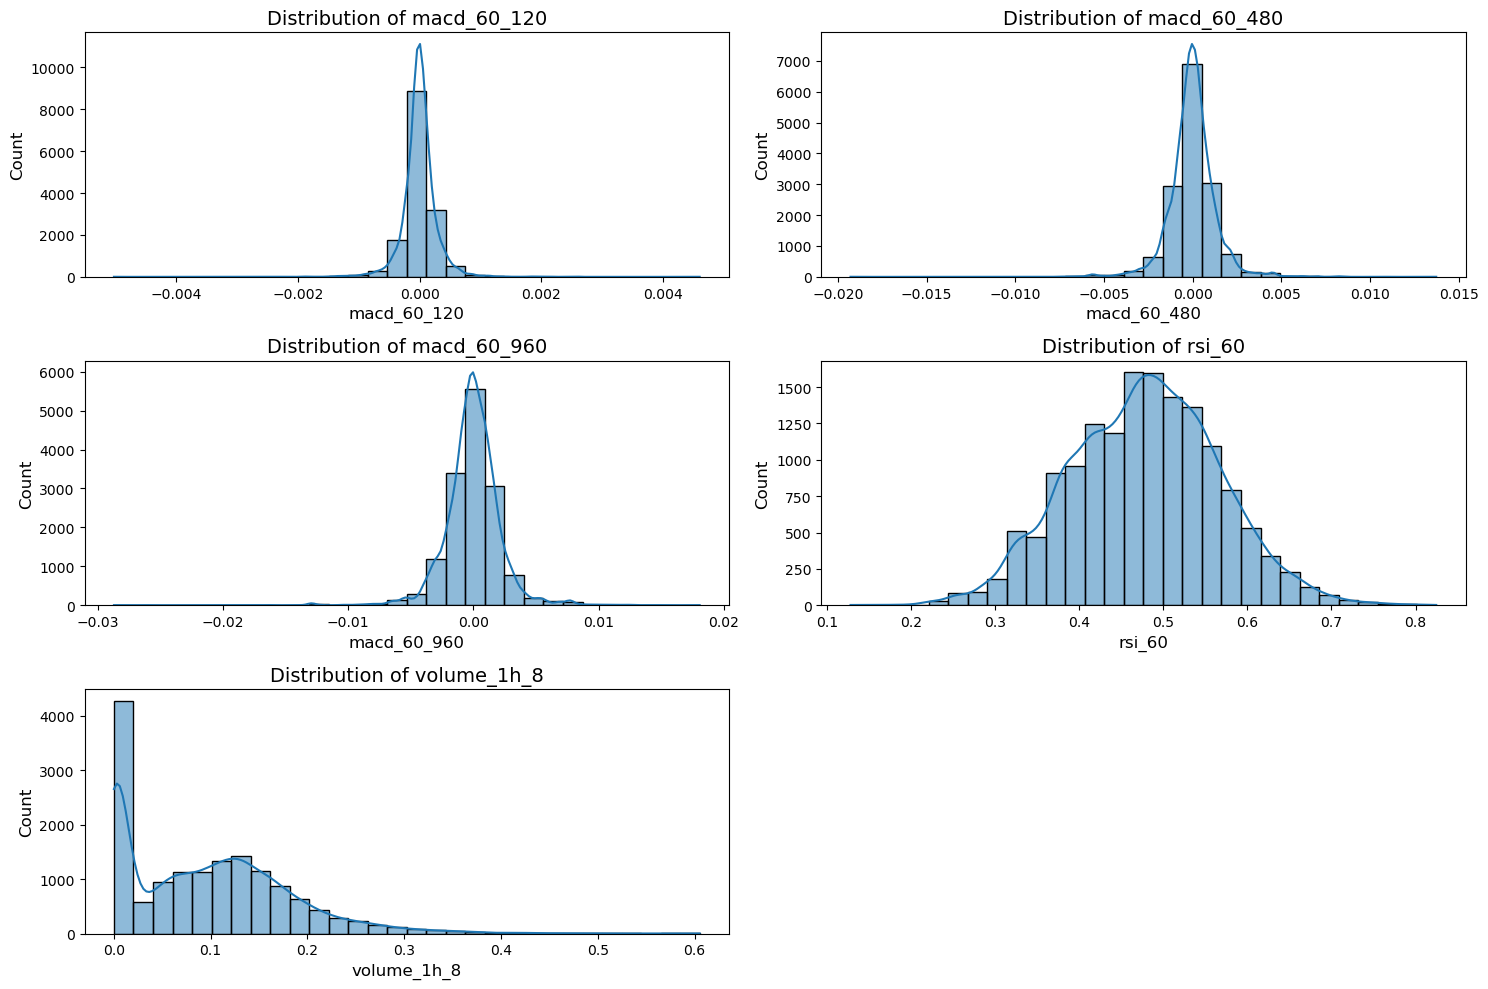

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['macd_60_120', 'macd_60_480', 'macd_60_960', 'rsi_60', 'volume_1h_8']


plt.figure(figsize=(15, 10)) 

# Plot of histograms with KDE for each feature
for i, col in enumerate(features):
    plt.subplot(3, 2, i+1)  
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=14)  
    plt.xlabel(col, fontsize=12)  
    plt.ylabel('Count', fontsize=12) 

# Adjust the layout to make sure plots are not overlapping
plt.tight_layout()
plt.show()


The summary statistics and distribution plots provide valuable insights into the behavior of the financial indicators and the target variable. The MACD indicators (macd_60_120, macd_60_480, and macd_60_960) have very small mean values close to zero, suggesting that, on average, there is little divergence between short-term and long-term price trends. This is expected for MACD, as it measures momentum, with a typical range around zero. The distributions of all three MACD indicators show a concentration near zero, indicating that for most of the time, the stock's short-term and long-term momentum are balanced, with some extreme outliers showing significant momentum shifts. The RSI_60 has a mean of 0.477, with a nearly normal distribution(almost bell shaped curve), centered around 0.5, indicating that the stock is, on average, neither overbought nor oversold, but there are periods where it approached these thresholds (with minimum and maximum values of 0.128 and 0.824). The Volume (volume_1h_8) shows a relatively low mean (0.095), with a few instances of high trading activity (maximum of 0.605), suggesting that most of the time, the stock experiences low trading volume, with occasional bursts of high-volume trading.

The target variable, instrument_value_change_gross_pct, has a mean value of almost exactly 1.0, which means that, on average, the stock's price has not changed significantly. The small standard deviation (0.001015) and the narrow range of values (from 0.969063 to 1.012296) further support the conclusion that the stock's price has remained stable over the time periods represented in the dataset, with minor fluctuations around 1% up or down. This overall stability is reflected in the indicators, where momentum and volume also remain relatively low, with occasional spikes in activity or price movement.

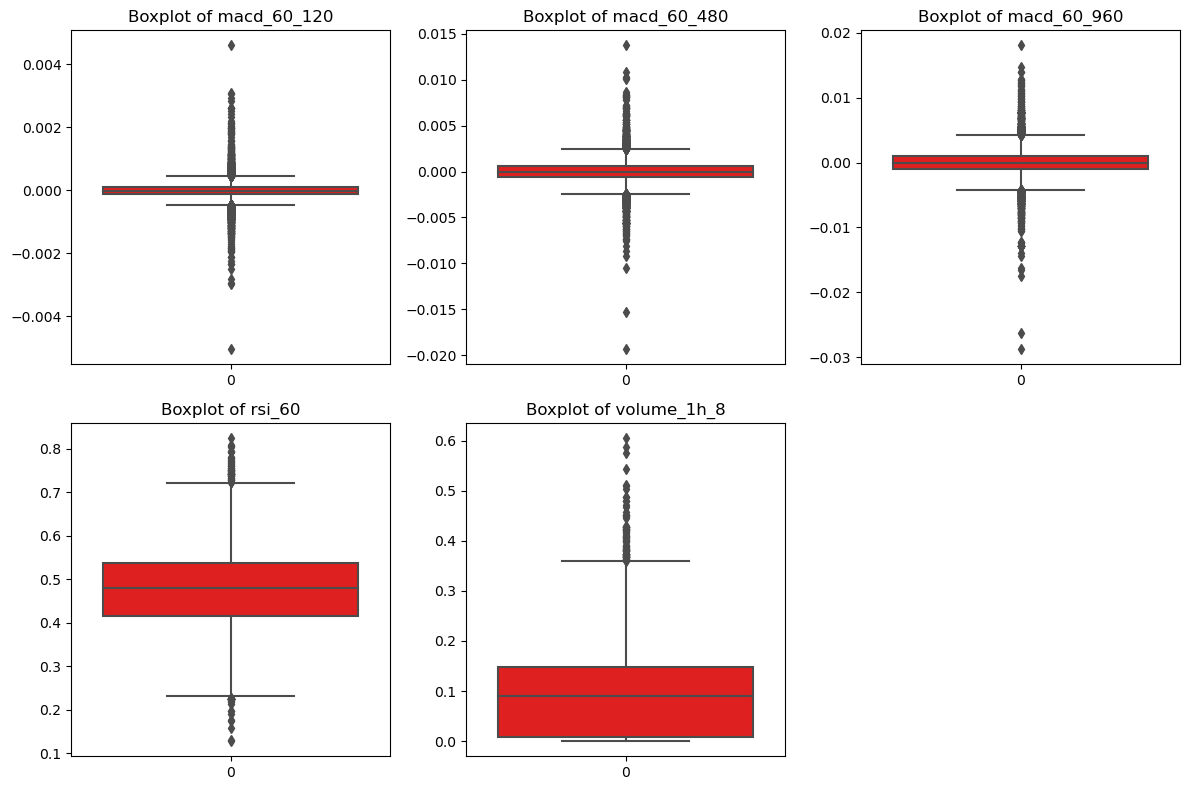

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to check outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(['macd_60_120', 'macd_60_480', 'macd_60_960', 'rsi_60', 'volume_1h_8']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data[col], color='red') 
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


The analysis of the MACD features (macd_60_120, macd_60_480, macd_60_960) shows that these indicators are tightly clustered around zero, which is typical for MACD as it measures the difference between two moving averages. However, each MACD feature presents numerous outliers on both sides of the whiskers, representing periods of significant upward or downward momentum, especially for the longer periods of macd_60_480 and macd_60_960. The presence of these outliers suggests occasional periods of higher volatility, where the stock experienced sharp shifts in momentum, potentially corresponding to key market events or unusual price trends.

The RSI feature (rsi_60) is well-distributed, with values ranging from 0.1 to 0.8, and most data points falling between 0.4 and 0.6, indicating that the stock is generally in a neutral state, neither significantly overbought nor oversold. There are some moderate outliers above 0.7 (indicating overbought conditions) and below 0.3 (indicating oversold conditions), suggesting occasional extremes in market sentiment. These outliers could mark critical points where the stock may experience price reversals, making them important for predicting future price changes.

The volume feature (volume_1h_8) reveals a heavily skewed distribution, with the majority of the data concentrated near the lower end, close to zero, suggesting that trading volume is relatively low most of the time. However, there are significant outliers above 0.3, representing periods of high trading activity, which may correspond to important market events or sudden price shifts driven by increased investor interest. These high-volume periods are often linked to major price movements, indicating that spikes in trading activity could play a key role in understanding the stock's behavior and predicting price changes.

In financial markets, outliers often provide valuable signals about unusual but important events, such as stock market crashes, sudden price surges, or major trading volume changes. By keeping these outliers, the model can learn to handle such situations and make better predictions when similar scenarios occur in the test data.

Therefore, it's a good strategy to keep the outliers and focus on building a model that can generalize well to unseen data, including volatile market conditions.

In [8]:
from scipy.stats import skew, kurtosis

#Check Skewness & Kurtosis

for col in ['macd_60_120', 'macd_60_480', 'macd_60_960', 'rsi_60', 'volume_1h_8']:
    print(f'{col} - Skewness: {skew(data[col]):.3f}, Kurtosis: {kurtosis(data[col]):.3f}')


macd_60_120 - Skewness: 0.182, Kurtosis: 23.248
macd_60_480 - Skewness: -0.088, Kurtosis: 11.262
macd_60_960 - Skewness: -0.397, Kurtosis: 9.352
rsi_60 - Skewness: 0.004, Kurtosis: -0.039
volume_1h_8 - Skewness: 0.808, Kurtosis: 0.760


The skewness and kurtosis analysis verifies the observations made from the earlier plots, where the MACD features (macd_60_120, macd_60_480, macd_60_960) showed tightly clustered values around zero but with numerous outliers, confirming the presence of heavy tails and sharp momentum shifts, as indicated by the high kurtosis values. The moderate skewness in these features aligns with the slight asymmetry seen in the distribution plots. The RSI feature (rsi_60), which exhibited a well-distributed, symmetric shape in the plots, is further validated by near-zero skewness and kurtosis, confirming it follows an almost normal distribution. Similarly, the volume (volume_1h_8) showed a right-skewed distribution with spikes in the earlier boxplots, which aligns with the positive skewness and slightly elevated kurtosis observed. Overall, the results from skewness and kurtosis reinforce the earlier graphical insights, confirming the similar patterns in the data.








# 2.1 BIVARIATE & MULTIVARIATE ANALYSIS (Linear relationship)

/var/folders/y5/y0kl7kvx2s59p5d6dyx0vd_c0000gn/T/ipykernel_2628/4043525311.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


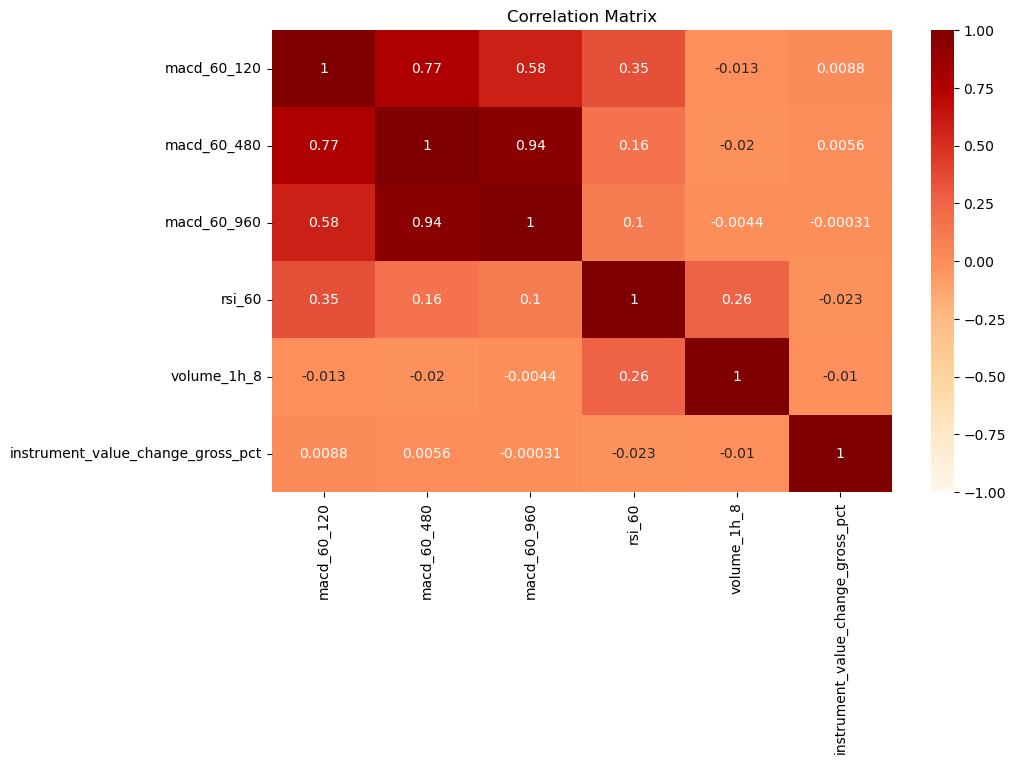

In [9]:
# Calculate and display the correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = data.corr()

# Visualize the correlation matrix with a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='OrRd', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


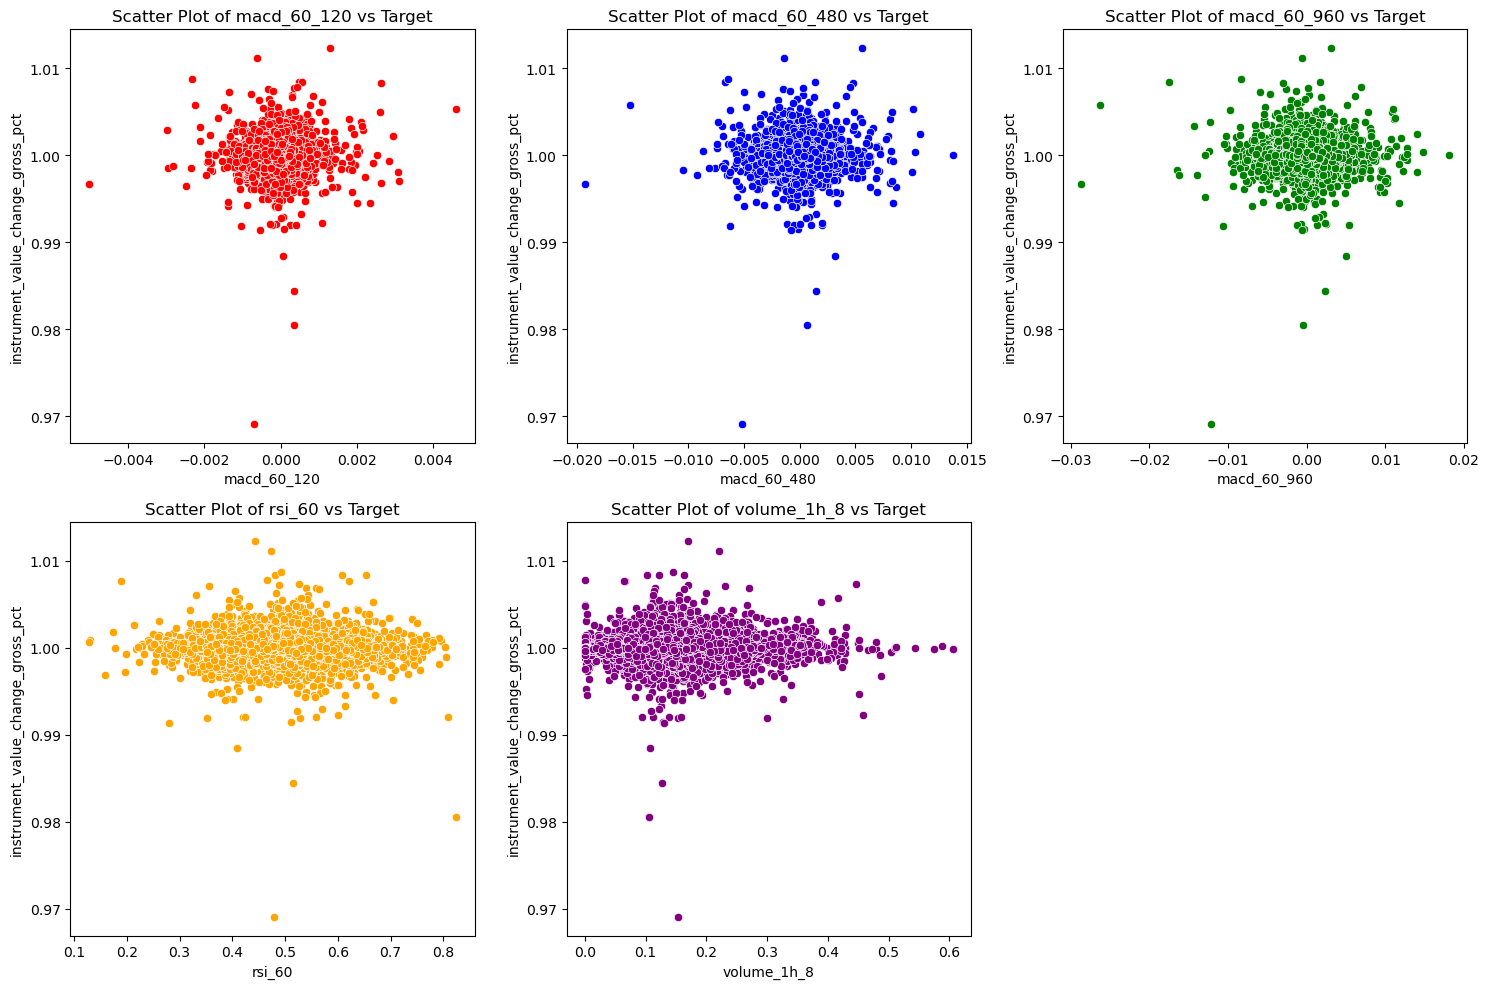

In [10]:
# Scatter plots of features against the target variable with different colors
plt.figure(figsize=(15, 10))


colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, (col, color) in enumerate(zip(['macd_60_120', 'macd_60_480', 'macd_60_960', 'rsi_60', 'volume_1h_8'], colors)):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=data[col], y=data['instrument_value_change_gross_pct'], color=color)
    plt.title(f'Scatter Plot of {col} vs Target')

plt.tight_layout()
plt.show()


The heatmap and scatter plots both indicate weak relationships between the features and the target variable, instrument_value_change_gross_pct. The correlation matrix shows minimal linear correlation between the MACD features, RSI, and Volume with the target, all having values close to zero. This is further supported by the scatter plots, where the data points for the MACD features (macd_60_120, macd_60_480, and macd_60_960), RSI (rsi_60), and Volume (volume_1h_8) appear clustered and dispersed without clear trends.However, the MACD features are highly correlated with each other, particularly between macd_60_480 and macd_60_960 (correlation of 0.94), which is expected due to their similar calculations over different time periods.  These results suggest that the features do not exhibit strong linear relationships with the target, indicating that more complex, non-linear models might be needed to capture the underlying patterns affecting price changes.

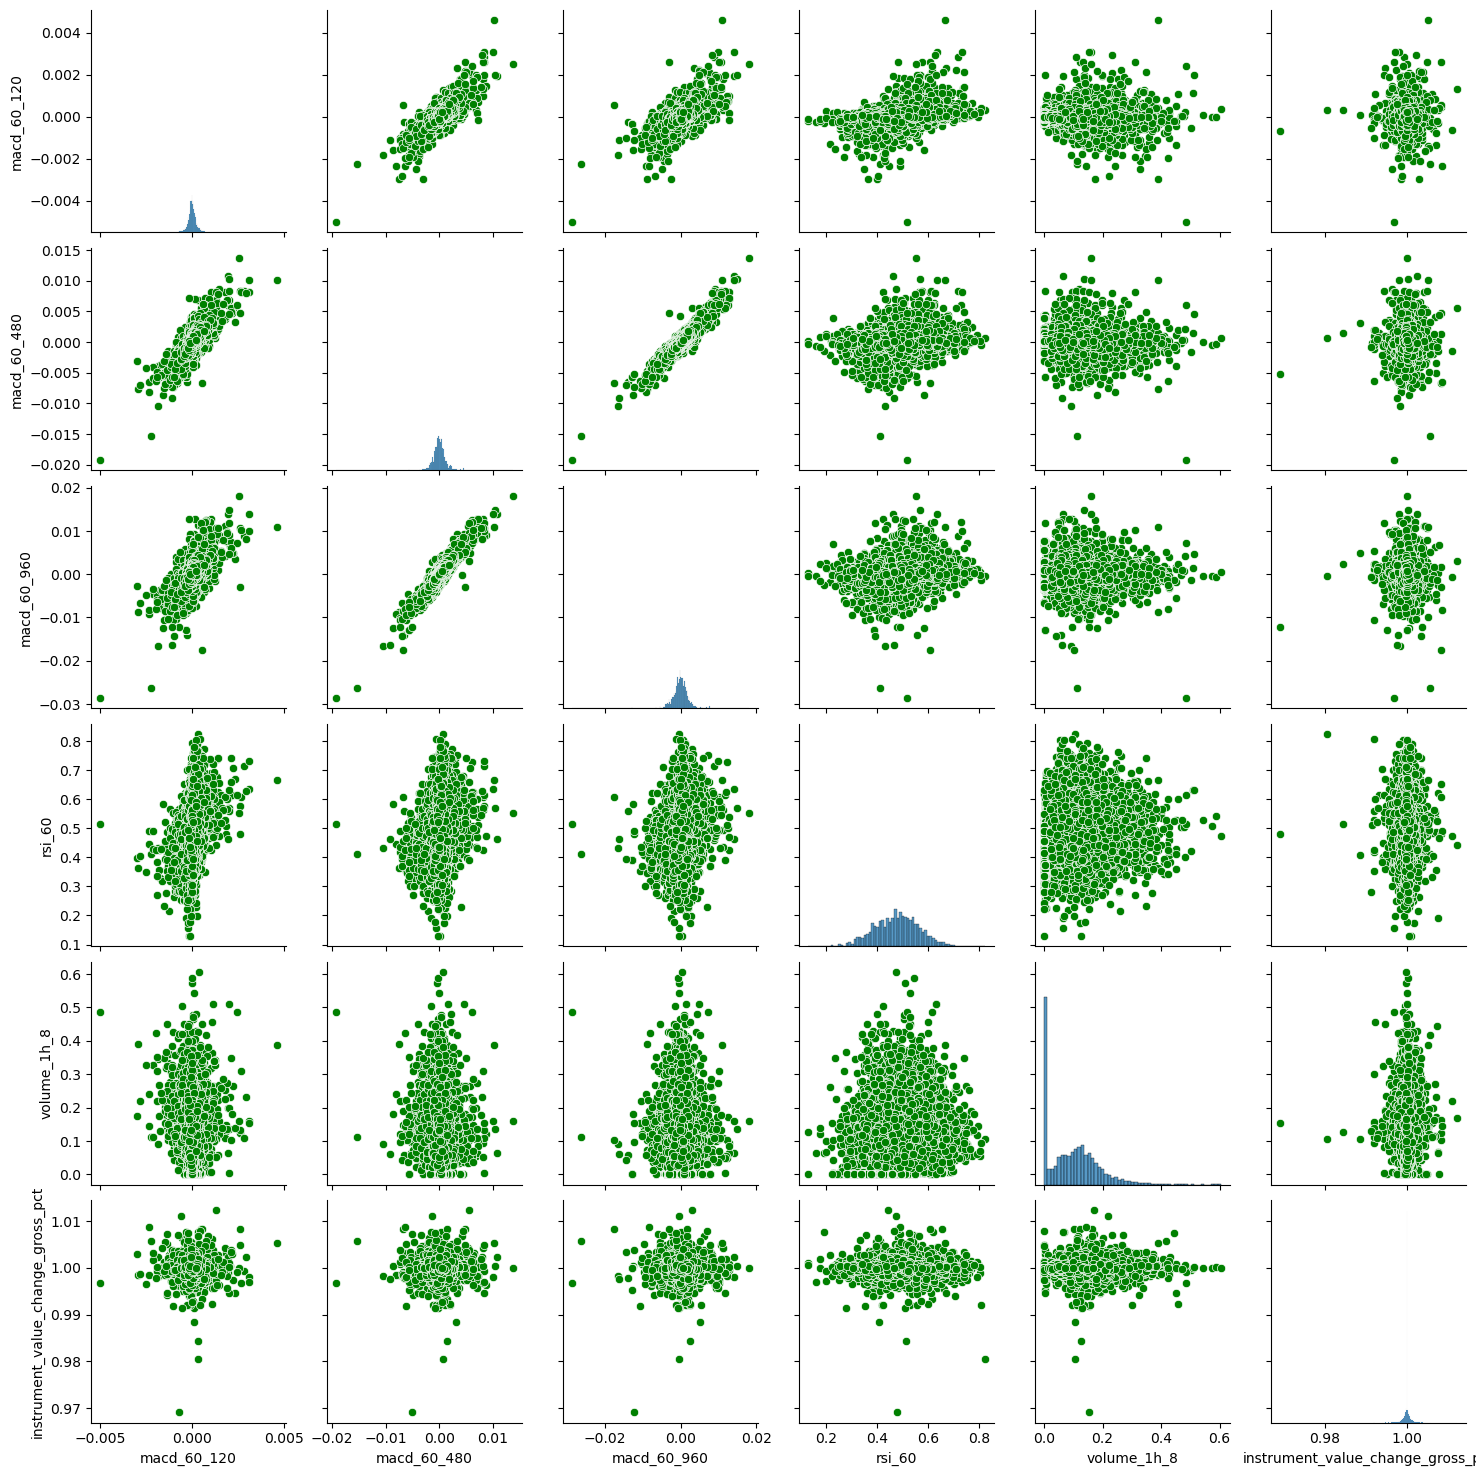

In [11]:
# Pair plot with all variables
sns.pairplot(data[['macd_60_120', 'macd_60_480', 'macd_60_960', 'rsi_60', 'volume_1h_8', 'instrument_value_change_gross_pct']],
             plot_kws={'color': 'green'}) 


The pair plot reinforces earlier observations, showing weak relationships between the features and the target variable, instrument_value_change_gross_pct. The MACD features (macd_60_120, macd_60_480, and macd_60_960) are highly correlated with one another, as evident by the clear linear patterns between them, while their relationships with the target variable appear scattered without clear trends. Similarly, RSI (rsi_60) and Volume (volume_1h_8) show dispersed patterns, further confirming that there are no strong linear relationships with the target. Overall, this suggests that while the features may be interrelated, their impact on the target variable might require non-linear modeling techniques.

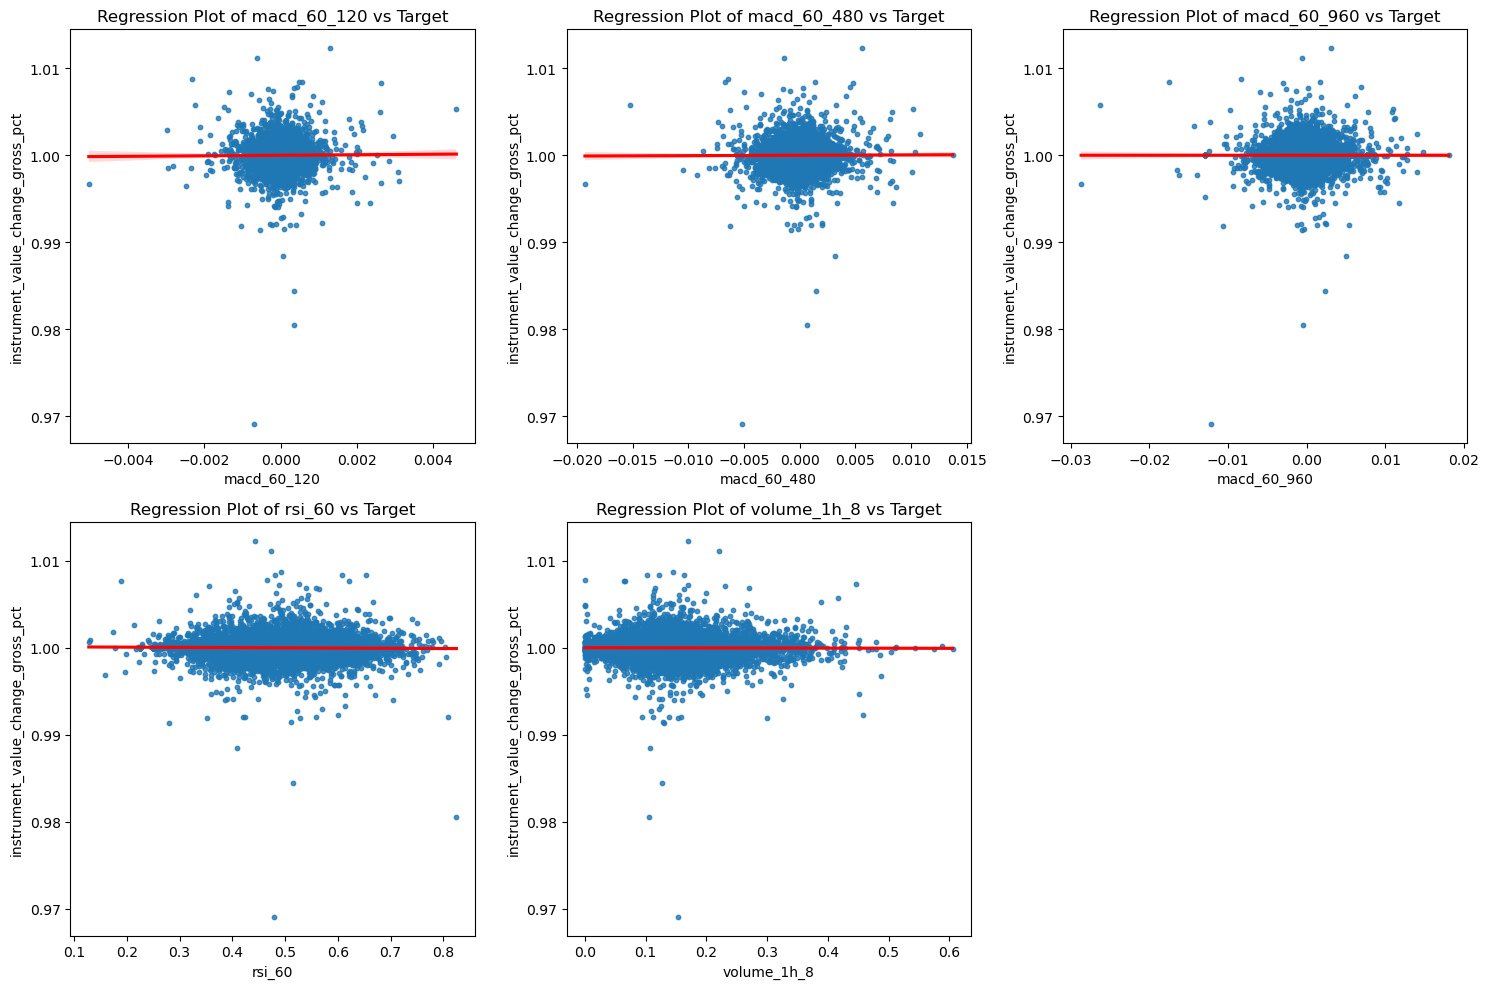

In [12]:
# Plot regression lines
plt.figure(figsize=(15, 10))

for i, col in enumerate(['macd_60_120', 'macd_60_480', 'macd_60_960', 'rsi_60', 'volume_1h_8']):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=data[col], y=data['instrument_value_change_gross_pct'], scatter_kws={'s': 10}, line_kws={'color': 'red'})
    plt.title(f'Regression Plot of {col} vs Target')

plt.tight_layout()
plt.show()


The regression plots show flat regression lines across all the features, indicating that there is little to no linear relationship between the independent variables (MACD, RSI, Volume) and the target variable, instrument_value_change_gross_pct. The data points are widely dispersed around the line, reinforcing the earlier findings of weak correlation. This suggests that linear models may not be effective in capturing the relationships between these features and the target, and more complex modeling approaches may be needed to identify potential non-linear patterns.








# 2.2 BIVARIATE & MULTIVARIATE ANALYSIS (non-linear relationship)

Mutual Information Scores:
 macd_60_120    0.356296
macd_60_480    0.346686
macd_60_960    0.342244
rsi_60         0.362905
volume_1h_8    0.484424
dtype: float64


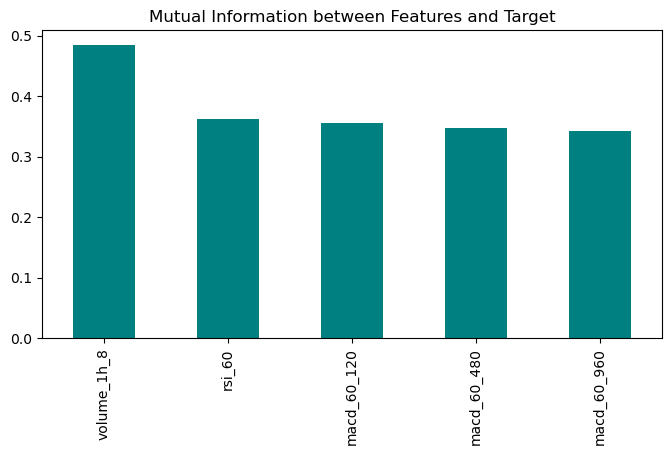

In [13]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import pandas as pd

# Mutual information between features and the target
mi = mutual_info_regression(data[['macd_60_120', 'macd_60_480', 'macd_60_960', 'rsi_60', 'volume_1h_8']], data['instrument_value_change_gross_pct'])

# Display Mutual Information scores
mi_series = pd.Series(mi, index=['macd_60_120', 'macd_60_480', 'macd_60_960', 'rsi_60', 'volume_1h_8'])
print("Mutual Information Scores:\n", mi_series)

# Plot of MI scores 
plt.figure(figsize=(8, 4))
mi_series.sort_values(ascending=False).plot(kind='bar', color='teal') 
plt.title('Mutual Information between Features and Target')
plt.show()


The Mutual Information analysis measures the dependence between the features and the target variable. In this case, the feature volume_1h_8 has the highest mutual information score (~0.48), indicating that trading volume has the strongest association with the instrument's price change percentage. This suggests that higher trading volumes could provide more predictive power for the target variable. The feature rsi_60 (with a score of ~0.36) also exhibits a notable relationship with the target, implying that the RSI could play a role in determining price shifts. Other MACD features, such as macd_60_120, macd_60_480, and macd_60_960, have relatively lower mutual information scores, indicating weaker relationships with the target. However, their presence still holds predictive value. 

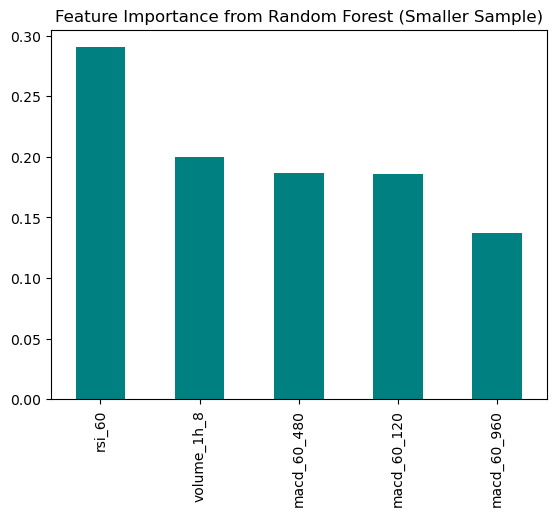

  0%|          | 0/100 [00:00<?, ?it/s]

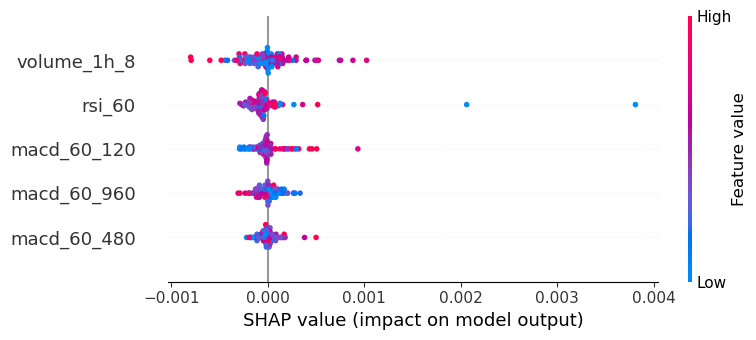

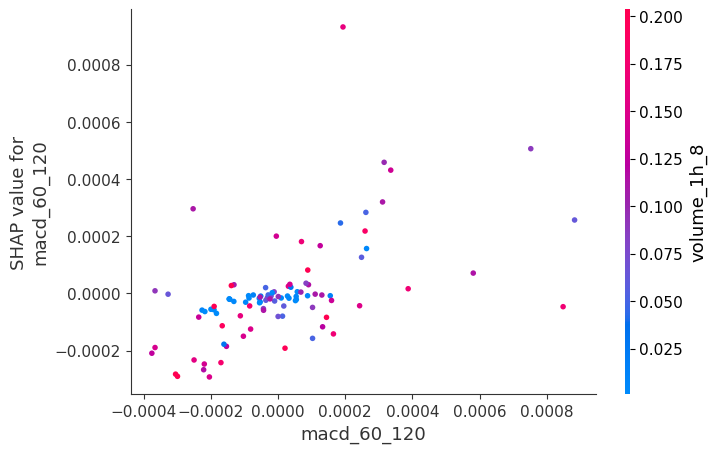

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt


# Features and target
X = data[['macd_60_120', 'macd_60_480', 'macd_60_960', 'rsi_60', 'volume_1h_8']]
y = data['instrument_value_change_gross_pct']

# Step 1: Using an smaller sample of the data to speed up processing
# Sample 500 rows for faster performance
sample_data = data.sample(500, random_state=42)
X_sample = sample_data[['macd_60_120', 'macd_60_480', 'macd_60_960', 'rsi_60', 'volume_1h_8']]
y_sample = sample_data['instrument_value_change_gross_pct']

# Step 2: Train a Random Forest model with reduced number of trees 
rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_sample, y_sample)

# Step 3: Feature importance from Random Forest
importances = pd.Series(rf.feature_importances_, index=X_sample.columns)
importances.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Feature Importance from Random Forest (Smaller Sample)")
plt.show()


# Step 4: Using Kernel SHAP Explainer on only 100 rows for faster SHAP value calculation
X_shap_sample = X_sample.sample(100, random_state=42)
explainer = shap.KernelExplainer(rf.predict, X_shap_sample)
shap_values = explainer.shap_values(X_shap_sample)

# Step 5: SHAP summary plot
shap.summary_plot(shap_values, X_shap_sample)

# Step 6: SHAP dependence plot for a specific feature (e.g., 'macd_60_120')
shap.dependence_plot("macd_60_120", shap_values, X_shap_sample)


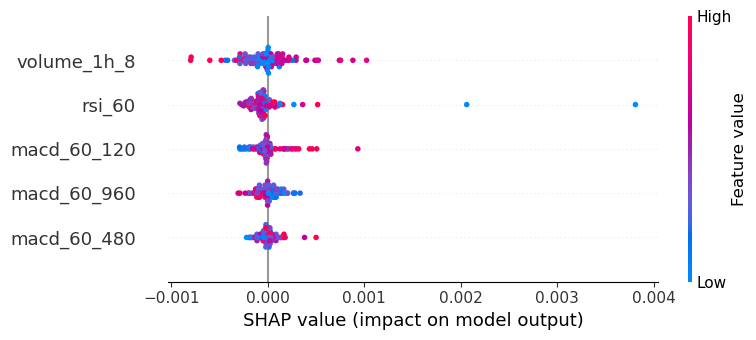

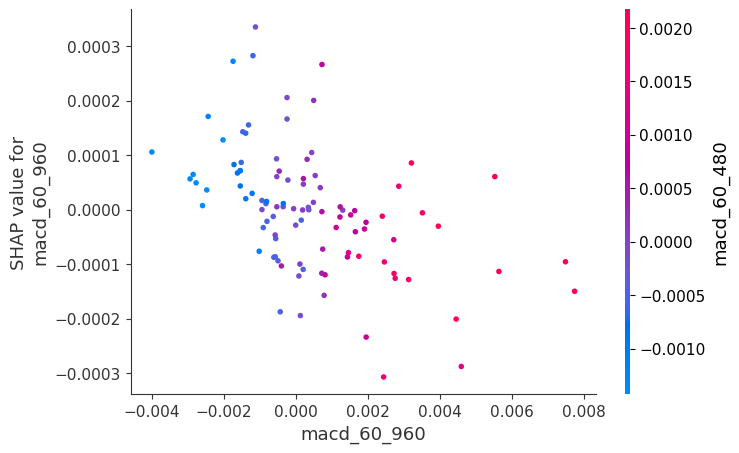

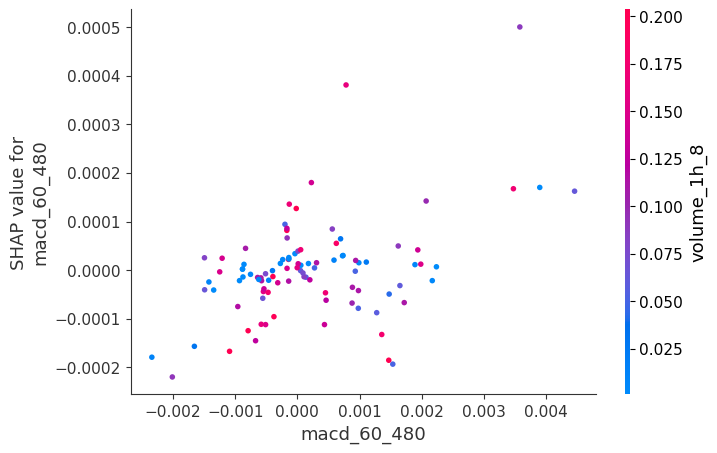

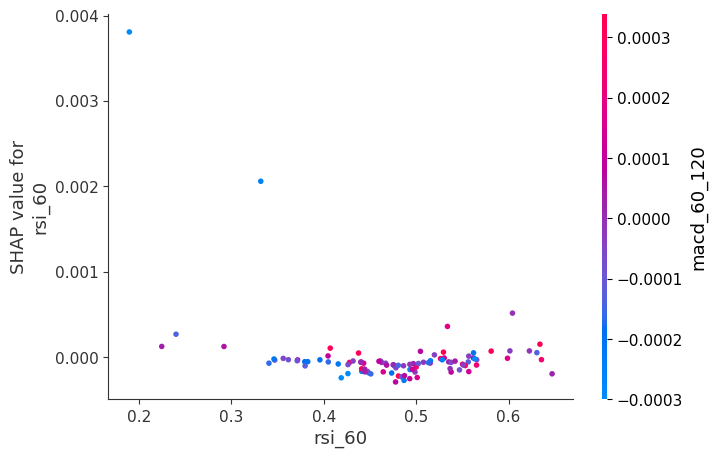

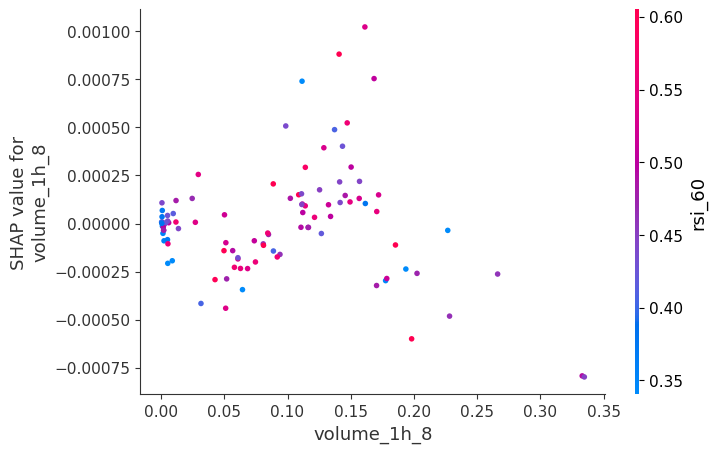

In [15]:
import shap
import matplotlib.pyplot as plt



# Step 1: SHAP summary plot 
shap.summary_plot(shap_values, X_shap_sample)

# Step 2: SHAP dependence plots for other features
# For 'macd_60_960'
shap.dependence_plot("macd_60_960", shap_values, X_shap_sample)

# For 'macd_60_480'
shap.dependence_plot("macd_60_480", shap_values, X_shap_sample)

# For 'rsi_60'
shap.dependence_plot("rsi_60", shap_values, X_shap_sample)

# For 'volume_1h_8' 
shap.dependence_plot("volume_1h_8", shap_values, X_shap_sample)


Both the Random Forest importance plot and SHAP plots highlight that the RSI and volume are crucial indicators for predicting the instrument value change. This makes sense in the financial context, as RSI is often used to gauge momentum and volume spikes typically correlate with significant market events.

The MACD features (especially those over longer time windows like 480 and 960) seem to have a smaller but still relevant influence on the model. They may be capturing longer-term trends that are more subtle but still important.



In [16]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features up to degree 2 
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(data[['macd_60_120', 'macd_60_480', 'macd_60_960', 'rsi_60', 'volume_1h_8']])

# Convert back to DataFrame to see the new interaction features
poly_feature_names = poly.get_feature_names_out(['macd_60_120', 'macd_60_480', 'macd_60_960', 'rsi_60', 'volume_1h_8'])
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Display the new features
print(X_poly_df.head())


   macd_60_120  macd_60_480  macd_60_960    rsi_60  volume_1h_8  \
0    -0.000721    -0.002389    -0.002574  0.454857     0.168235   
1    -0.001007    -0.004163    -0.005210  0.475186     0.175232   
2    -0.000420    -0.003673    -0.005462  0.551021     0.112161   
3    -0.000056    -0.002270    -0.004307  0.521836     0.054191   
4     0.000133    -0.000932    -0.002833  0.526225     0.047146   

   macd_60_120 macd_60_480  macd_60_120 macd_60_960  macd_60_120 rsi_60  \
0             1.721186e-06             1.854484e-06           -0.000328   
1             4.189861e-06             5.243849e-06           -0.000478   
2             1.541302e-06             2.291676e-06           -0.000231   
3             1.264585e-07             2.399417e-07           -0.000029   
4            -1.237704e-07            -3.760215e-07            0.000070   

   macd_60_120 volume_1h_8  macd_60_480 macd_60_960  macd_60_480 rsi_60  \
0                -0.000121                 0.000006           -0.001087

The interaction values in the table provide insights into how different feature pairs (such as MACD, RSI, and Volume) combine to influence the target variable (instrument value change). While some interactions, such as between rsi_60 and volume_1h_8, show moderate positive values, suggesting a slight combined effect, most of the interactions have very small magnitudes. This indicates that the individual contributions of features might be more significant than their interactions.

While interactions exist, their impact appears limited in this dataset. Thus, focusing on capturing non-linearities through more advanced modeling techniques (e.g., gradient boosting or random forests) will likely be more fruitful than relying heavily on feature interactions.

# 3. TIME SERIES ANALYSIS (exploring pattern with respect to timestamp)

In [17]:
# Extract day of the week and hour from timestamp
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['hour_of_day'] = data['timestamp'].dt.hour

# Extract month or year if needed
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year


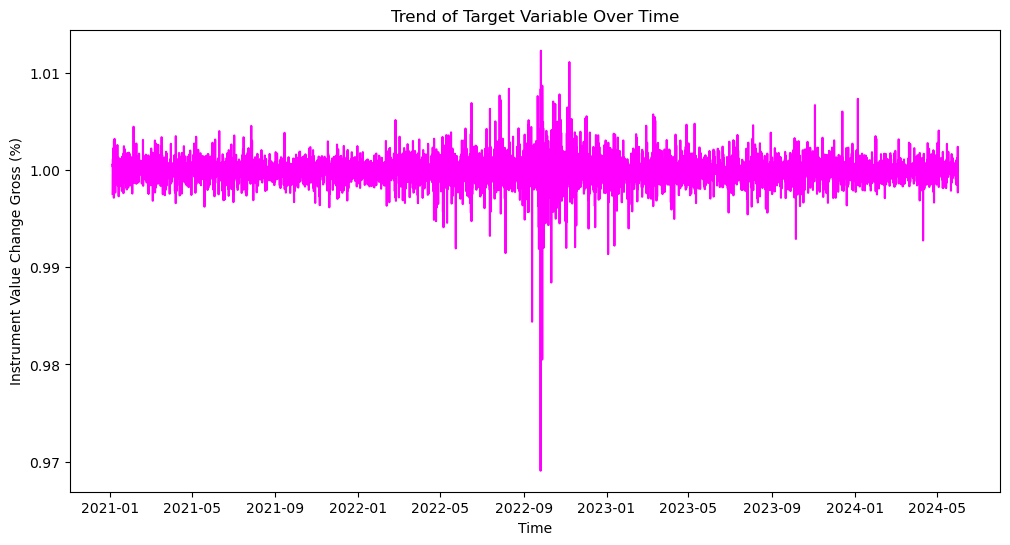

In [18]:
# Line plot to see trends over time 
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['instrument_value_change_gross_pct'], color='magenta')
plt.title('Trend of Target Variable Over Time')
plt.xlabel('Time')
plt.ylabel('Instrument Value Change Gross (%)')
plt.show()


The line plot of the target variable (instrument_value_change_gross_pct) over time reveals that for much of the period, the value remains relatively stable around 1.00, indicating periods of low fluctuation in the instrument's value. However, there are distinct periods of increased volatility, with sharp upward and downward deviations, which may correspond to significant market events or external factors impacting the instrument. Notably, starting around mid-2022, there is a clear increase in volatility, with more frequent and pronounced swings in value. A significant negative spike is observed in late 2022, likely reflecting a major market event such as a price drop or crash. This suggests that while the market or instrument was largely stable, certain periods exhibited erratic behavior, which might be important when building predictive models. 

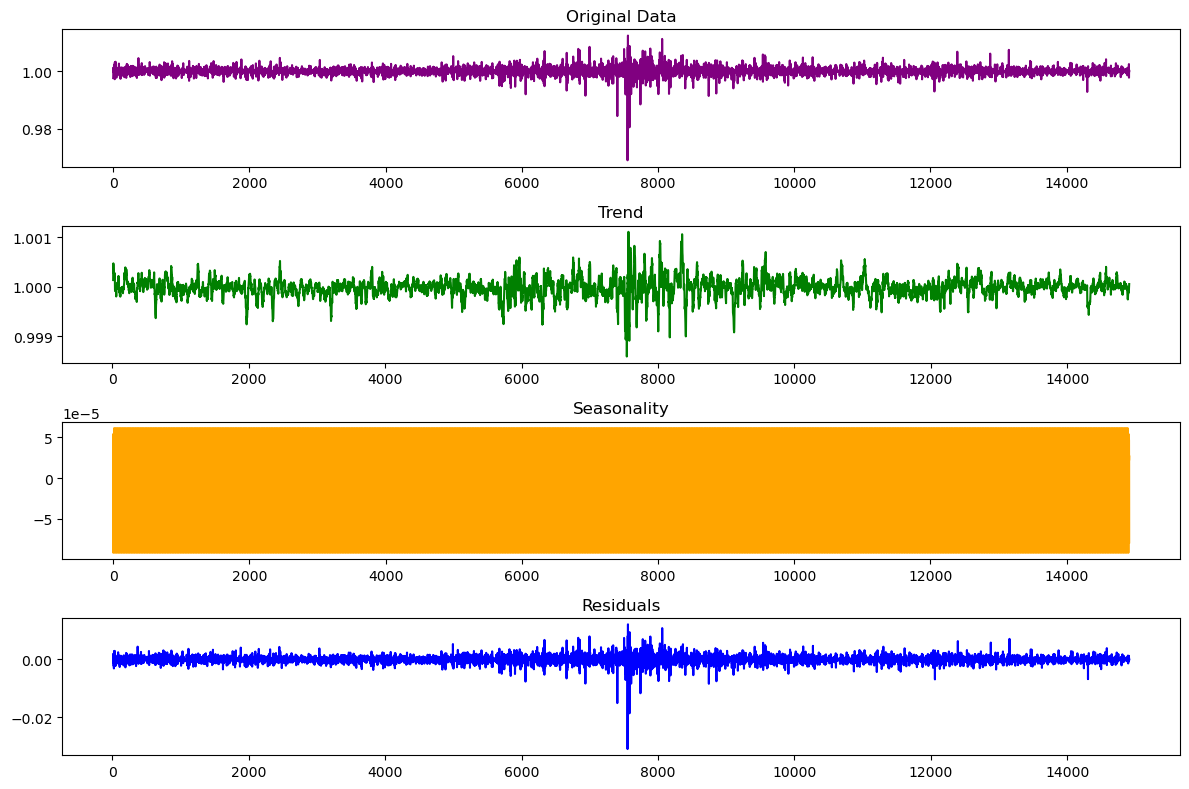

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
decomposition = seasonal_decompose(data['instrument_value_change_gross_pct'], period=24, model='additive')

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot of decomposition components 
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['instrument_value_change_gross_pct'], color='purple')
plt.title('Original Data')

plt.subplot(4, 1, 2)
plt.plot(trend, color='green')
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(seasonal, color='orange')
plt.title('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(residual, color='blue')
plt.title('Residuals')

plt.tight_layout()
plt.show()


The seasonal decomposition plot and autocorrelation plot provide insights into the temporal characteristics of the target variable (instrument_value_change_gross_pct). From the decomposition plot, we observe a relatively stable trend component with slight fluctuations, indicating minor long-term changes in the target variable over time. The seasonality component is nearly constant, suggesting that there is no clear periodic or seasonal pattern in the data. The residual component highlights some noise and random fluctuations, but overall, the target variable behaves in a fairly stable manner without strong cyclical behaviors.

<Figure size 800x400 with 0 Axes>

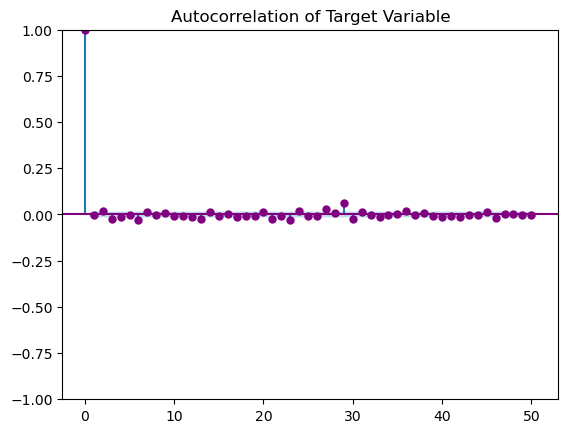

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Autocorrelation plot for the target variable
plt.figure(figsize=(8, 4))
plot_acf(data['instrument_value_change_gross_pct'], lags=50, alpha=0.05, color='purple')  # Change color to purple
plt.title('Autocorrelation of Target Variable')
plt.show()


The autocorrelation plot further supports these observations. Beyond the expected correlation at lag 0, the autocorrelation values quickly drop to near zero and remain flat across different lags. This implies that the target variable does not exhibit significant autocorrelation, meaning past values do not have a strong influence on future values. Together, these results suggest that the target variable lacks clear temporal dependencies and seasonality, making time-series forecasting models potentially less useful. 

# MODEL SELECTION 

In [23]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/99/a1/5219921a9bcb5388623f81908ff43d606aec2e512e0c02f6eb49f3b3caa8/xgboost-2.1.1-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.6 MB/s eta 0:00:00a 0:00:01


In [25]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/11/3f/49913ed111286e23bcc40daab54542d80924264dca8ae371514039ab83ab/lightgbm-4.5.0-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:00a 0:00:01


In [26]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Prepare feature set and target variable
X = data[['macd_60_120', 'macd_60_480', 'macd_60_960', 'rsi_60', 'volume_1h_8']]
y = data['instrument_value_change_gross_pct']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scaling the features (fit on training data, transform both train and test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define models to evaluate
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42)
}

# Step 5: Evaluation function for cross-validation on the training data
def evaluate_model(model, X_train, y_train):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    mae = -cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error').mean()
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error').mean())
    return mae, rmse

# Step 6: Fit models on training data and collect results (Cross-validation)
results = {}
for name, model in models.items():
    mae, rmse = evaluate_model(model, X_train_scaled, y_train)
    results[name] = {'MAE': mae, 'RMSE': rmse}

# Step 7: Display the cross-validation results for each model
print("Cross-Validation Results:")
for model_name, metrics in results.items():
    print(f"{model_name} - MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}")

# Step 8: Train models on the full training data and evaluate on test set
print("\nTest Set Evaluation:")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Fit the model on the training data
    y_pred_test = model.predict(X_test_scaled)  # Predict on the test data
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print(f"{name} - Test MAE: {test_mae:.4f}, Test RMSE: {test_rmse:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 9548, number of used features: 5
[LightGBM] [Info] Start training from score 0.999978
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 9549, number of used features: 5
[LightGBM] [Info] Start training from score 0.999990
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

The results of the model evaluation show that Random Forest, XGBoost, and LightGBM performed similarly in terms of predicting the target variable. During the 5-fold cross-validation, all three models achieved almost identical performance with a Mean Absolute Error (MAE) of 0.0006 and a Root Mean Squared Error (RMSE) of 0.0011. This indicates that the models are equally capable of fitting the training data.

On the test set, the differences were again minimal, with XGBoost and LightGBM slightly outperforming Random Forest in terms of MAE. XGBoost and LightGBM both achieved a Test MAE of 0.0005 and Test RMSE of 0.0010, while Random Forest recorded a Test MAE of 0.0006 and Test RMSE of 0.0010. This marginal improvement by XGBoost and LightGBM suggests that these two models are more capable of generalizing on unseen data.

However, given the nature of the dataset with relatively low variability in the target values, XGBoost may be a better choice over LightGBM. XGBoost tends to perform better when the dataset lacks significant variability because it applies more sophisticated regularization, which helps prevent overfitting in such cases. Furthermore, XGBoost generally offers more robustness and flexibility with hyperparameter tuning, allowing finer control over the learning process, particularly in datasets that do not exhibit extreme shifts in feature values or target variability.